Observations and Insights: 
Below is my analysis of Pymaceuticals Inc.'s data from their most recent animal study looking at different drug regimens and their effect on tumor size. This dataset had balanced numbers of male and female mice. The Capomulin regimen seemed to perform the best with the final average tumor size being the smallest out of the four drugs analyzed. Mice on the Capomulin regime consistently saw a decrease in tumor size over time. Tumor volume and mouse weight appeared to be very strongly correlated for mice on the Capomulin regime, as well.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
len(mouse_study_complete)

1893

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_duplicate = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID'])]
mouse_study_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    #must use the last instance of the duplicates to get the final measure of the tumor size per drug
mouse_study_clean = mouse_study_complete.drop_duplicates(subset='Mouse ID', keep='last', inplace=False, ignore_index=True)
mouse_study_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
dfmean = mouse_study_clean.groupby(['Drug Regimen']).mean()
dfmean

dfmedian = mouse_study_clean.groupby(['Drug Regimen']).median()
dfmedian

dfvariance = mouse_study_clean.groupby(['Drug Regimen']).var()
dfvariance

dfstd = mouse_study_clean.groupby(['Drug Regimen']).std()
dfstd

dfsem = mouse_study_clean.groupby(['Drug Regimen']).sem()
dfsem
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
tumorstats = {'Mean': dfmean['Tumor Volume (mm3)'], 'Median': dfmedian['Tumor Volume (mm3)'], 'Variance': dfvariance['Tumor Volume (mm3)'], 'Standard Deviation': dfstd['Tumor Volume (mm3)'], 'SEM': dfsem['Tumor Volume (mm3)'] }
tumorstatsdf = pd.DataFrame(tumorstats)
tumorstatsdf


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    #call head
mouse_study_clean
# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

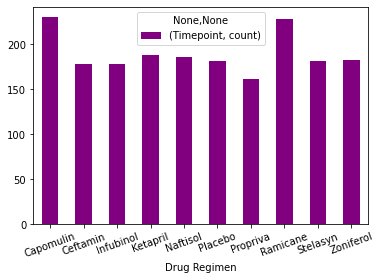

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_timepoint = mouse_study_complete.groupby('Drug Regimen').agg({'Timepoint': ['count']})

#make the bar plot
pandas_timepoint.plot.bar(rot=20, color='purple')

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
dfcount = mouse_study_complete.groupby(['Drug Regimen']).count()
x=dfcount['Timepoint'].keys().tolist()
y=dfcount['Timepoint']
y

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

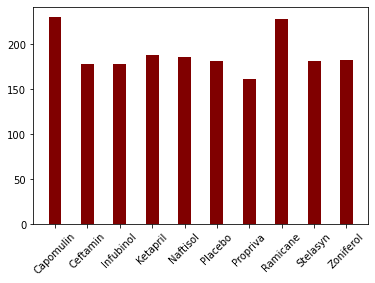

In [15]:
plt.bar(x, y, color ='maroon', width = 0.4)
plt.xticks(rotation = 45)

<AxesSubplot:ylabel='Sex'>

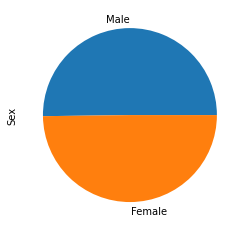

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_clean['Sex'].value_counts().plot.pie()

([<matplotlib.patches.Wedge at 0x7fdd28c70310>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

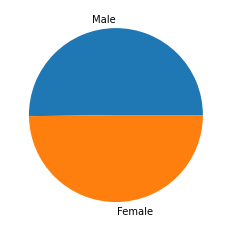

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_study_clean['Sex'].value_counts(), labels=['Male', 'Female'])

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#get rid of the spaces in the drug names that we want
mouse_study_clean.rename(columns = {'Drug Regimen': 'drug_regimen'}, inplace = True)

#create new dataframes for each drug we are looking at
capo_df=mouse_study_clean[mouse_study_clean.drug_regimen == 'Capomulin']
capotumor_df = capo_df['Tumor Volume (mm3)']

rami_df=mouse_study_clean[mouse_study_clean.drug_regimen == 'Ramicane']
ramitumor_df = rami_df['Tumor Volume (mm3)']

infu_df=mouse_study_clean[mouse_study_clean.drug_regimen == 'Infubinol']
infutumor_df = infu_df['Tumor Volume (mm3)']

caft_df=mouse_study_clean[mouse_study_clean.drug_regimen == 'Ceftamin']
cafttumor_df = caft_df['Tumor Volume (mm3)']

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #note to self, the IQR is looking to find 50% of the dataset around the median, and we can do this with the below equations.
    #the IQR will give me a single number that is the width of a range for q3-q1. 
    
    #create a function to find the IQR for all of the drugs.
def iqrfunc(df): 
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    return iqr, q1, q3

    #create a loop with the above function to return all of the IQR values of the needed drugs, and then find each mouse that is outside of the IQR range. These are my outliers.
druglistdf = [capotumor_df, ramitumor_df, infutumor_df, cafttumor_df]
iqrlist = []
iqrmask = []

for drug in druglistdf:
    iqrvalue, q1value, q3value = iqrfunc(drug)
    iqrlist.append(iqrvalue)
    
    #mask all mice who are within the width of the IQR to find the outlier mice, and then print results to show the outlier mice per drug regimen
    maskeddrug=drug.mask(drug.lt(q3value) & drug.gt(q1value))
    iqrmask.append(maskeddrug) 
print(iqrmask)

[1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14           NaN
16           NaN
20           NaN
22           NaN
24           NaN
28           NaN
30           NaN
31           NaN
32           NaN
34           NaN
35           NaN
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
181    46.539206
Name: Tumor Volume (mm3), dtype: float64, 0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15          NaN
17          NaN
18          NaN
19          NaN
21          NaN
23          NaN
25          NaN
26          NaN
27          NaN
29          NaN
33          NaN
41    40.659006
42    40.667713
43    45.220869
44    43.047543
46    43.419381
47    43.166373
48    44.183451
Name: Tumor Volume (mm3), dtype: float64, 49     67.973419
50     65.525743
57           NaN
58     66.083066
70     72.226731
74   

Text(0.5, 1.0, 'Capomulin tumor plot')

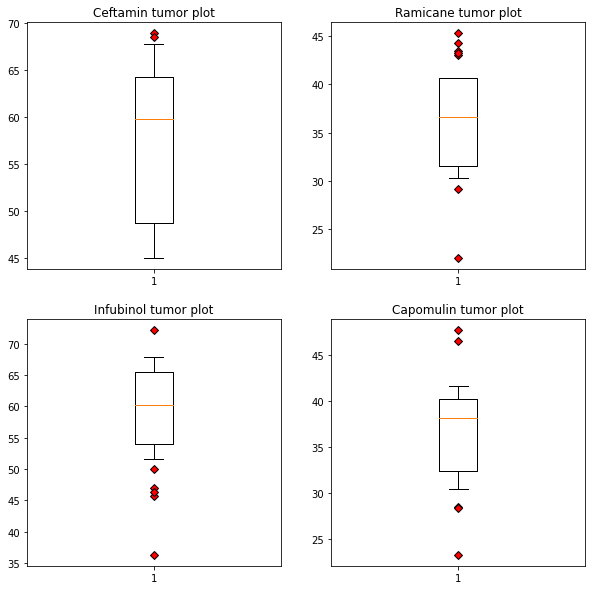

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    #of note- I chose the min and max (whiskers) to be 0.25 to show some more outliers because the default min and max were too big and did not show any outliers for dataset. 
red_diamond = dict(markerfacecolor='r', marker='D')

#here is the box plot with all four plots in the same figure to show the outliers of tumor volume for the four drugs. 
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].boxplot(cafttumor_df, whis=0.25, flierprops=red_diamond)
axs[0, 0].set_title('Ceftamin tumor plot')
axs[0, 1].boxplot(ramitumor_df, whis=0.25, flierprops=red_diamond)
axs[0, 1].set_title('Ramicane tumor plot')
axs[1, 0].boxplot(infutumor_df, whis=0.25, flierprops=red_diamond)
axs[1, 0].set_title('Infubinol tumor plot')
axs[1, 1].boxplot(capotumor_df, whis=0.25, flierprops=red_diamond)
axs[1, 1].set_title('Capomulin tumor plot')

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

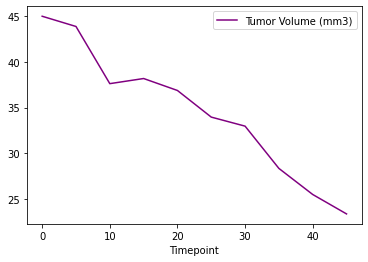

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
    #get rid of the spaces in the variables I want to use
mouse_study_complete.rename(columns = {'Drug Regimen': 'drug_regimen'}, inplace = True)

mouse_study_complete.rename(columns = {'Mouse ID': 'mouse_ID'}, inplace = True)
    #now pull out Capomlin only mice
capo_df2=mouse_study_complete[mouse_study_complete.drug_regimen == 'Capomulin']
    #now select one mouse (s185) to look at within this new df
capo_mouse1df= capo_df2[capo_df2.mouse_ID == 's185']
    #now create plot with this one selected mouse
capo_mouse1df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', color='purple')


As time went on, the tumor for mouse s185 got smaller. Yay! This is what we would hope for.

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

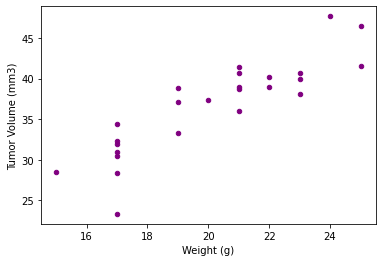

In [22]:
# Generate a scatter plot of tumor volume vs. mouse weight for the Capomulin regimen.
    #I am going to pick the last time point for this because it is info I already have from above. capo_df comes from earlier df that uses the last timepoint for tumor. 
    #I will select my independent variable (x) as mouse weight, and my dependent variable (y) as tumor volume
capo_df.plot.scatter(x= 'Weight (g)', y= 'Tumor Volume (mm3)', color='purple')

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
    # for mouse weight and tumor volume for the Capomulin regimen

#calculate the regression
tumweight_regress = linregress(capo_df['Weight (g)'], capo_df['Tumor Volume (mm3)'])
tumweight_regress

LinregressResult(slope=1.7504682289585032, intercept=1.4481469525549073, rvalue=0.8767060403658115, pvalue=9.084429088673527e-09, stderr=0.2002651323645367, intercept_stderr=4.068291402922098)

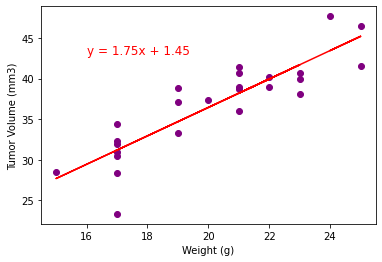

In [29]:
#plot the above regression
xvalues = capo_df['Weight (g)']
yvalues = capo_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(16,43),fontsize=12,color="red")

#plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(xvalues,yvalues, c='purple')

plt.plot(xvalues, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#show plot
plt.show()